## Population regression function(PRF)
+ fixed,but unkown

## Simple regression function
+ Ordinary least square(OLS)
+ $E(u|x) = 0$

## Using wooldridge dataset in python
```python
import wooldridge
df_apple = wooldridge.data('apple')
```

## OLS regression code

In [1]:
import statsmodels.formula.api as smf
import numpy as np
import wooldridge
import seaborn as sns

In [15]:
wooldridge.data()

  J.M. Wooldridge (2016) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

In [13]:
#load data
wooldridge.data('wage1',description=True)
wage1 = wooldridge.data('wage1')

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [11]:
wage1.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'smsa', 'northcen', 'south', 'west', 'construc', 'ndurman',
       'trcommpu', 'trade', 'services', 'profserv', 'profocc', 'clerocc',
       'servocc', 'lwage', 'expersq', 'tenursq'],
      dtype='object')

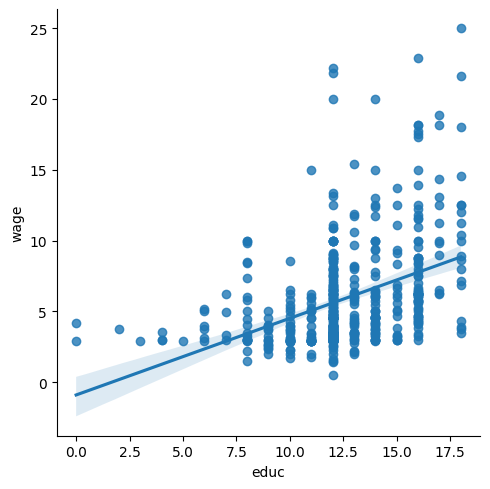

In [14]:
sns.lmplot(data=wage1, x="educ", y="wage")

In [22]:
wooldridge.data('ceosal1',description=True)
ceosal1 = wooldridge.data('ceosal1')

name of dataset: ceosal1
no of variables: 12
no of observations: 209

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| salary   | 1990 salary, thousands $      |
| pcsalary | % change salary, 89-90        |
| sales    | 1990 firm sales, millions $   |
| roe      | return on equity, 88-90 avg   |
| pcroe    | % change roe, 88-90           |
| ros      | return on firm's stock, 88-90 |
| indus    | =1 if industrial firm         |
| finance  | =1 if financial firm          |
| consprod | =1 if consumer product firm   |
| utility  | =1 if transport. or utilties  |
| lsalary  | natural log of salary         |
| lsales   | natural log of sales          |
+----------+-------------------------------+

I took a random sample of data reported in the May 6, 1991 issue of
Businessweek.


In [29]:
logx = ceosal1[:]
logx['sales'] = np.log(logx['sales'])
logy = ceosal1[:]
logy['salary'] = np.log(logy['salary'])
logxy = ceosal1[:]
logxy['sales'] = np.log(logxy['sales'])
logxy['salary'] = np.log(logxy['salary'])

TypeError: lmplot() got an unexpected keyword argument 'ax'

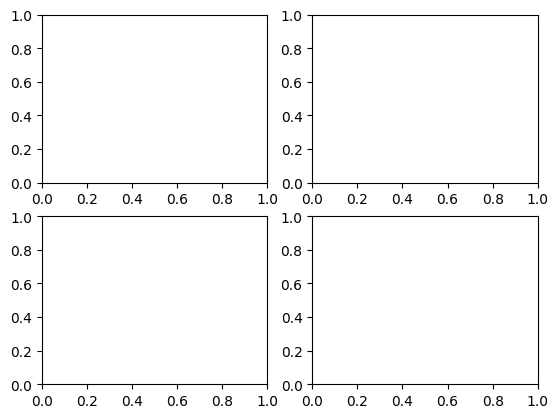

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(2, 2)
sns.lmplot(data=ceosal1, x="sales", y="salary", ax = axes[0])
sns.lmplot(data=logx, x="sales", y="salary", ax = axes[1])
sns.lmplot(data=logy, x="sales", y="salary", ax = axes[2])
sns.lmplot(data=logxy, x="sales", y="salary", ax = axes[3])

In [35]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(data=None, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    com

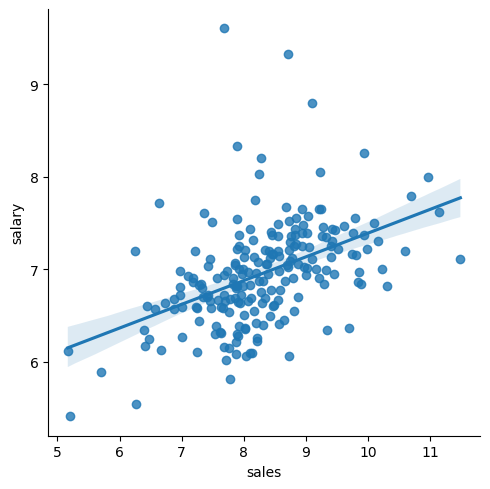

In [30]:
sns.lmplot(data=logxy, x="sales", y="salary")

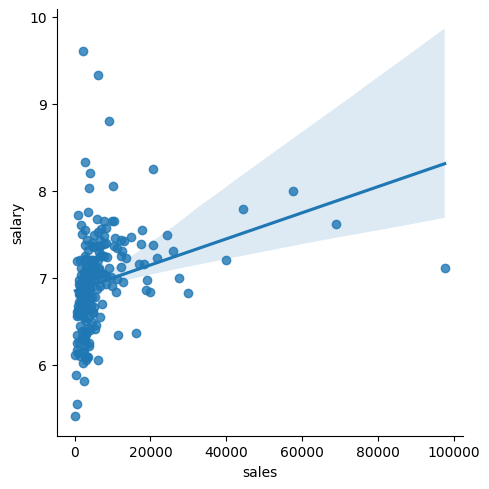

In [27]:
sns.lmplot(data=logy, x="sales", y="salary")

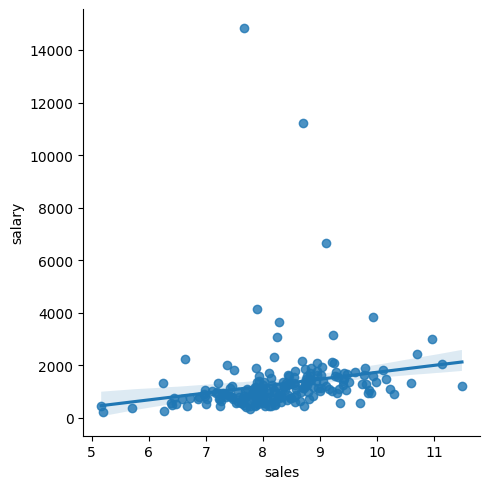

In [28]:
sns.lmplot(data=logx, x="sales", y="salary")

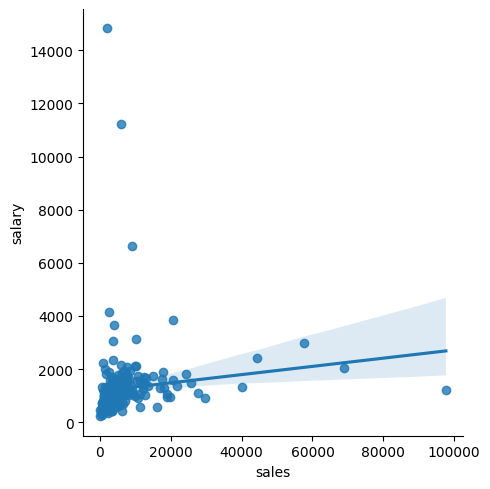

In [17]:
sns.lmplot(data=ceosal1, x="sales", y="salary")

In [17]:
dat1 = dat
dat1['sleep'] = dat['sleep']

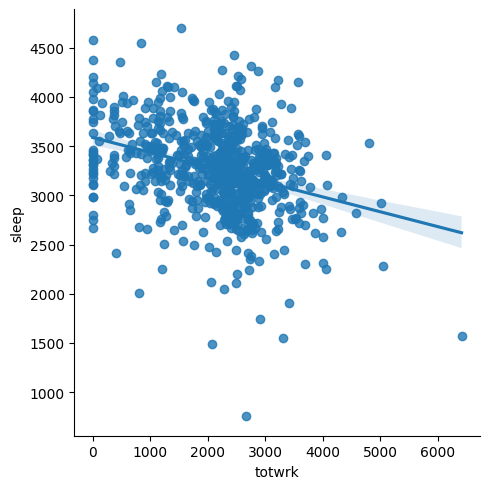

In [18]:
sns.lmplot(data=dat1, x="totwrk", y="sleep")

In [10]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('sleep ~ totwrk', data=dat).fit()

In [11]:
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     81.09
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.99e-18
Time:                        20:20:09   Log-Likelihood:                -5267.1
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     704   BIC:                         1.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3586.3770     38.912     92.165      0.0

In [48]:
rsquareds = []
variables = list(dat.columns)
variables.remove('sleep')

In [52]:
for var in variables:
    results = smf.ols(f'sleep ~ {var}', data=dat).fit()
    rsquareds.append(results.rsquared)

In [55]:
import pandas as pd
df = pd.DataFrame({
    'Variable':variables,
    'Rsquared':rsquareds
})

In [58]:
df

,Variable,Rsquared
0,age,0.008167
1,black,0.000732
2,case,0.008837
3,clerical,0.002312
4,construc,0.001700
5,educ,0.009026
6,earns74,0.005912
7,gdhlth,0.010573
8,inlf,0.000736
9,leis1,0.023741
